In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Parte 1: Unir DataFrames

In [3]:
data_1 = {
        'id': ['1', '2', '3', '4', '5'],
        'primer_nombre': ['Alex', 'Amy', 'Valentina', 'Alice', 'Lina'], 
        'apellido': ['Anderson', 'Ruales', 'Marin', 'Barbosa', 'Robles']}

data_2 = {
        'id': ['4', '5', '6', '7', '8'],
        'primer_nombre': ['Luis', 'Brian', 'Mariana', 'Marcela', 'Carlos'], 
        'apellido': ['Ruiz', 'Giralgo', 'Ortegon', 'Palacios', 'Gallego']}

data_3 = {
        'id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

df1 = pd.DataFrame(data_1)
df2 = pd.DataFrame(data_2)
df3 = pd.DataFrame(data_3)

## Unir 2 DF por filas

In [4]:
filas_join = pd.concat([df1, df2], axis=0)
columnas_join = pd.concat([df1, df2], axis=1)

print('Unidas por las filas')
filas_join

Unidas por las filas


id primer_nombre  apellido
0  1          Alex  Anderson
1  2           Amy    Ruales
2  3     Valentina     Marin
3  4         Alice   Barbosa
4  5          Lina    Robles
0  4          Luis      Ruiz
1  5         Brian   Giralgo
2  6       Mariana   Ortegon
3  7       Marcela  Palacios
4  8        Carlos   Gallego

## Unir 2 DF por columnas

In [5]:
print('Unidas por las columnas')
columnas_join

Unidas por las columnas


id primer_nombre  apellido id primer_nombre  apellido
0  1          Alex  Anderson  4          Luis      Ruiz
1  2           Amy    Ruales  5         Brian   Giralgo
2  3     Valentina     Marin  6       Mariana   Ortegon
3  4         Alice   Barbosa  7       Marcela  Palacios
4  5          Lina    Robles  8        Carlos   Gallego

## Merge 3 DF por la columna 'id'

In [25]:
from functools import reduce

# todos los datos
dfs = [filas_join, df3]
#merge 
mid_df = reduce(lambda  left,right: pd.merge(left,right,on=['id'],how='outer'), dfs)
mid_df

id primer_nombre  apellido  test_id
0    1          Alex  Anderson     51.0
1    2           Amy    Ruales     15.0
2    3     Valentina     Marin     15.0
3    4         Alice   Barbosa     61.0
4    4          Luis      Ruiz     61.0
5    5          Lina    Robles     16.0
6    5         Brian   Giralgo     16.0
7    6       Mariana   Ortegon      NaN
8    7       Marcela  Palacios     14.0
9    8        Carlos   Gallego     15.0
10   9           NaN       NaN      1.0
11  10           NaN       NaN     61.0
12  11           NaN       NaN     16.0

## Merge sólo con los datos con el mismo 'id'

In [27]:
id_df = reduce(lambda  left,right: pd.merge(left,right,on=['id'],how='inner'), dfs)
id_df

id primer_nombre  apellido  test_id
0  1          Alex  Anderson       51
1  2           Amy    Ruales       15
2  3     Valentina     Marin       15
3  4         Alice   Barbosa       61
4  4          Luis      Ruiz       61
5  5          Lina    Robles       16
6  5         Brian   Giralgo       16
7  7       Marcela  Palacios       14
8  8        Carlos   Gallego       15

# Parte 2: GroupBy

In [8]:
# leer archivo
al_df = pd.read_csv('datos_alcohol.txt')
# quitar valores vacíos
al_df = al_df.dropna()
# continentes
cont = al_df.continente.unique()

In [9]:
num_df = al_df.copy()
# quitar columna con valor no numerico
num_df = num_df.drop('pais',axis=1)
# agrupar por continente
cont_ag = num_df.groupby('continente')

## ¿Qué continente toma más cerveza en promedio?

In [10]:
media_cerveza = cont_ag['porciones_cerveza'].mean()
media_cerveza

continente
AF     61.471698
AS     37.045455
EU    193.777778
OC     89.687500
SA    175.083333
Name: porciones_cerveza, dtype: float64

Respuesta: Europa es el continente que consume más cerveza en promedio

## Analizar la columna de vino e imprimir un análisis básico estadístico del consumo.

In [11]:
vino = al_df.porciones_vino.describe()
vino

count    170.000000
mean      52.823529
std       83.762227
min        0.000000
25%        1.000000
50%        8.000000
75%       73.750000
max      370.000000
Name: porciones_vino, dtype: float64

## Para cada continente imprime los valores medio, mínimo y máximo para el consumo de licor

In [12]:
licor = cont_ag['porciones_licor'].describe()
licor

count        mean        std   min    25%    50%     75%    max
continente                                                                 
AF           53.0   16.339623  28.102794   0.0   1.00    3.0   19.00  152.0
AS           44.0   60.840909  84.362160   0.0   1.00   16.0   98.00  326.0
EU           45.0  132.555556  77.589115   0.0  81.00  122.0  173.00  373.0
OC           16.0   58.437500  70.504817   0.0  18.00   37.0   65.25  254.0
SA           12.0  114.750000  77.077440  25.0  65.75  108.5  148.75  302.0

## Para cada continente imprime el consumo medio de alcohol para todas la columnas.


In [13]:
mean_values = cont_ag.mean()
mean_values

porciones_cerveza  porciones_licor  porciones_vino  \
continente                                                       
AF                  61.471698        16.339623       16.264151   
AS                  37.045455        60.840909        9.068182   
EU                 193.777778       132.555556      142.222222   
OC                  89.687500        58.437500       35.625000   
SA                 175.083333       114.750000       62.416667   

            litros_totales_de_alcohol_puro  
continente                                  
AF                                3.007547  
AS                                2.170455  
EU                                8.617778  
OC                                3.381250  
SA                                6.308333

# Parte 3: Visualización

In [14]:
vdf = pd.read_csv('visualizacion.txt')
vdf = vdf.drop('index',axis=1)
vdf

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

## Realizar el histograma de la columna total_bill.

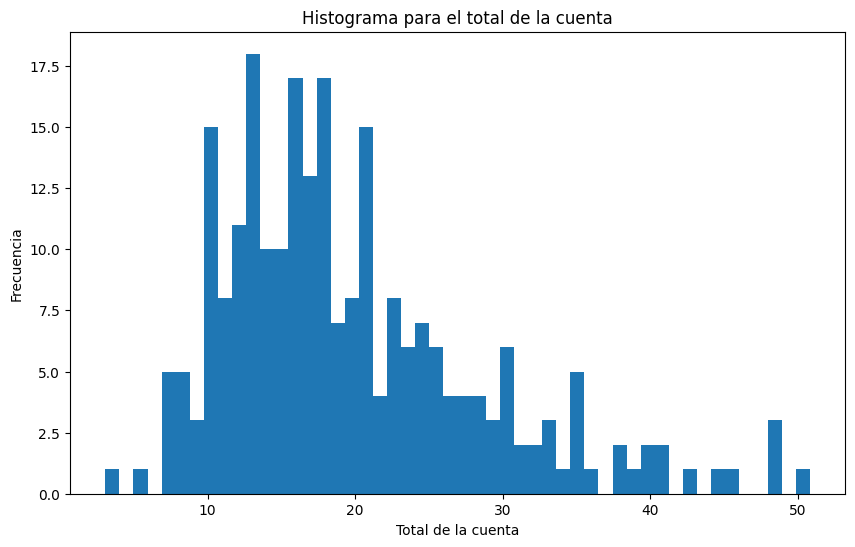

In [15]:
plt.figure(figsize=(10,6))
plt.title('Histograma para el total de la cuenta')
plt.xlabel('Total de la cuenta')
plt.ylabel('Frecuencia')
plt.hist(vdf['total_bill'], bins=50);

## Crear un scatter plot presentando la realcion entre total_bill y tip.

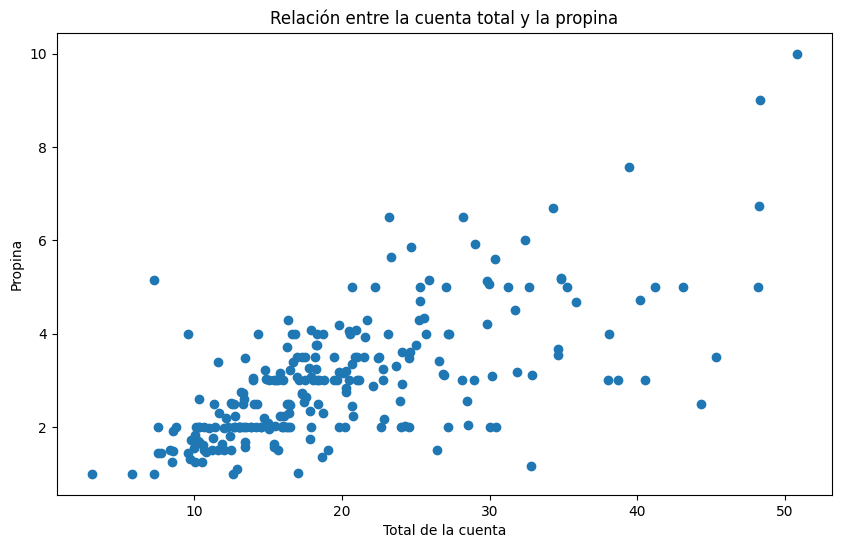

In [16]:
plt.figure(figsize=(10,6))
plt.title('Relación entre la cuenta total y la propina')
plt.xlabel('Total de la cuenta')
plt.ylabel('Propina')
plt.scatter(vdf['total_bill'], vdf['tip']);


## Presentar una relación entre los valores de los days y total_bill.

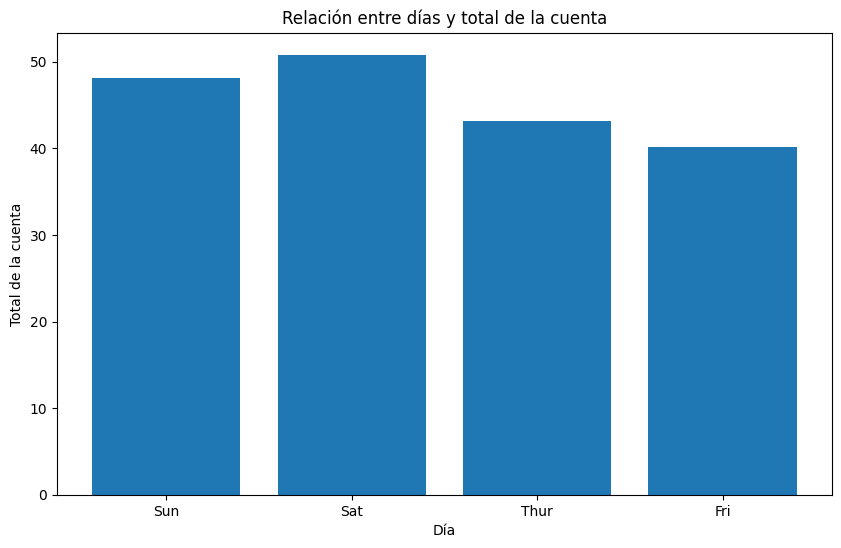

In [22]:
plt.figure(figsize=(10,6))
plt.title('Relación entre días y total de la cuenta')
plt.xlabel('Día')
plt.ylabel('Total de la cuenta')
plt.bar(vdf['day'], vdf['total_bill'])
plt.show()

La cuenta más alta se dio el sábado y la más baja los viernes.

## Cree un box plot que presente el total_bill por día diferenciando la hora (Cena o Almuerzo).

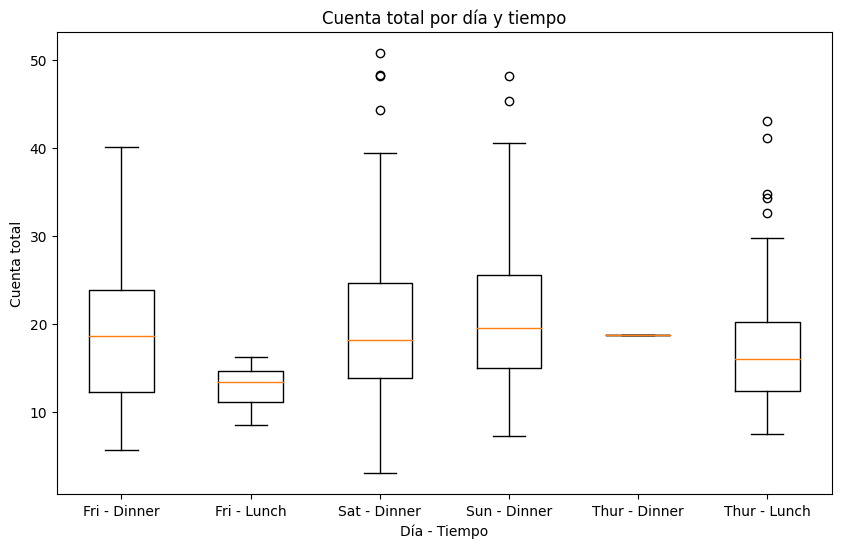

In [19]:
# Agrupar por día y hora
dt_g = vdf.groupby(['day', 'time'])
# crear dataframe para cada grupo
dt_dfs = [dt_g.get_group(g) for g in dt_g.groups]
# etiquetas para el boxplot
etiqueta = [f"{day} - {time}" for day, time in dt_g.groups.keys()]

# boxplot
plt.figure(figsize=(10,6))
plt.boxplot([df['total_bill'] for df in dt_dfs], labels=etiqueta)
plt.title('Cuenta total por día y tiempo')
plt.xlabel('Día - Tiempo')
plt.ylabel('Cuenta total')
plt.show()
